# Taxi Fare Prediction Study For NYC Green Taxi Using Regression

This is a real time data set.

# Problem Statement:

The objective of this study is to analyze and predict the total fare of taxi trips based on historical data. The total fare, represented by the "Total_amount" field, is influenced by various factors such as trip distance, time of day, location, passenger count, and payment method. This study aims to understand the key drivers of fare amounts and develop a predictive model that can estimate the total fare accurately.

# Data Description:
we have total of 69174 rows and 17 columns. you need to predict on the Total_Amount.


#    Taxi Fare Prediction Study

The dataset used for the taxi fare prediction study contains information related to individual taxi trips. The dataset is structured with the following fields:

1. VendorID (Categorical): A code indicating the LPEP provider that provided the record. It takes on two values:
    1: Creative Mobile Technologies, LLC
    2: VeriFone Inc.

2. lpep_pickup_datetime (DateTime): The date and time when the taxi meter was engaged, marking the start of the trip.

3. lpep_dropoff_datetime (DateTime): The date and time when the taxi meter was disengaged, indicating the end of the trip.

4. Passenger_count (Numeric): The number of passengers in the vehicle, entered by the driver.

5. Trip_distance (Numeric): The elapsed trip distance in miles reported by the taxi meter.

6. PULocationID (Categorical): TLC Taxi Zone in which the taxi meter was engaged, representing the pickup location.

7. DOLocationID (Categorical): TLC Taxi Zone in which the taxi meter was disengaged, representing the drop-off location.

8. RateCodeID (Categorical): The final rate code in effect at the end of the trip. It includes the following values:
    1: Standard rate
    2: JFK
    3: Newark
    4: Nassau or Westchester
    5: Negotiated fare
    6: Group ride
9. Store_and_fwd_flag (Categorical): A flag indicating whether the trip record was stored in the vehicle's memory before being sent to the vendor. It can take one of two values:
    "Y": Store and forward trip
    "N": Not a store and forward trip
10. Payment_type (Categorical): A numeric code signifying how the passenger paid for the trip, with values:

    1: Credit card
    2: Cash
    3: No charge
    4: Dispute
    5: Unknown
    6: Voided trip
11. Fare_amount (Numeric): The time-and-distance fare calculated by the taxi meter.

12. Extra (Numeric): Miscellaneous extras and surcharges, which may include rush hour and overnight charges.

13. MTA_tax (Numeric): A $0.50 MTA tax automatically triggered based on the metered rate in use.

14. Improvement_surcharge (Numeric): A $0.30 improvement surcharge assessed on hailed trips at the flag drop. This surcharge began being levied in 2015.

15. Tip_amount (Numeric): This field is automatically populated for credit card tips. Cash tips are not included.

16. Tolls_amount (Numeric): Total amount of all tolls paid during the trip.

17. Total_amount (Numeric): The total amount charged to passengers, which does not include cash tips.

# Performance metric
1. Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and provides an interpretable measure of prediction error in the same units as the target variable. It is more interpretable than MSE.

2. R-squared (R2): R-squared measures the proportion of the variance in the target variable that is predictable from the independent variables. It ranges from 0 to 1, where a higher R-squared value indicates a better fit of the model to the data.

In [1]:
import io
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# extracting the path to jupyter 
%cd "D:\Green Taxi Capstone Project"

D:\Green Taxi Capstone Project


In [3]:
!pip install pyarrow
#arrow is the library to access parquet files

In [4]:
#read_parquet is to read the parquet files
greentaxi=pd.read_parquet('green_tripdata_2023-05.parquet',engine='pyarrow')

In [5]:
# head() function is access or to show the row and columns in the file
# by deafault head() gives first 5 rows
greentaxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-05-01 00:52:10,2023-05-01 01:05:26,N,1.0,244,213,1.0,6.99,28.90,1.0,0.5,0.00,0.00,NaN,1.0,31.40,1.0,1.0,0.00
1,2,2023-05-01 00:29:49,2023-05-01 00:50:11,N,1.0,33,100,1.0,6.60,30.30,1.0,0.5,5.00,0.00,NaN,1.0,40.55,1.0,1.0,2.75
2,2,2023-05-01 00:25:19,2023-05-01 00:32:12,N,1.0,244,244,1.0,1.34,9.30,1.0,0.5,2.36,0.00,NaN,1.0,14.16,1.0,1.0,0.00
3,2,2023-05-01 00:07:06,2023-05-01 00:27:33,N,5.0,82,75,1.0,7.79,22.73,0.0,0.0,2.29,6.55,NaN,1.0,32.57,1.0,1.0,0.00
4,2,2023-05-01 00:43:31,2023-05-01 00:46:59,N,1.0,69,169,1.0,0.70,6.50,1.0,0.5,0.00,0.00,NaN,1.0,9.00,2.0,1.0,0.00


In [6]:
# tail() function is access or to show the row and columns in the file
# by deafault tail() gives last 5 rows
greentaxi.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
69169,2,2023-05-31 23:45:00,2023-06-01 00:04:00,None,NaN,106,225,NaN,4.39,21.44,0.0,0.0,0.00,0.0,NaN,1.0,22.44,NaN,NaN,NaN
69170,2,2023-05-31 23:59:00,2023-06-01 00:22:00,None,NaN,17,133,NaN,5.06,19.03,0.0,0.0,4.01,0.0,NaN,1.0,24.04,NaN,NaN,NaN
69171,2,2023-05-31 23:39:00,2023-05-31 23:55:00,None,NaN,66,189,NaN,2.18,15.31,0.0,0.0,3.26,0.0,NaN,1.0,19.57,NaN,NaN,NaN
69172,2,2023-05-31 23:42:00,2023-06-01 00:11:00,None,NaN,129,62,NaN,8.68,31.83,0.0,0.0,6.57,0.0,NaN,1.0,39.40,NaN,NaN,NaN
69173,2,2023-05-31 23:10:00,2023-05-31 23:24:00,None,NaN,61,37,NaN,2.32,12.91,0.0,0.0,2.78,0.0,NaN,1.0,16.69,NaN,NaN,NaN


In [7]:
#info() is used to get the total information about the file like no of rows and columns
greentaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69174 entries, 0 to 69173
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               69174 non-null  int32         
 1   lpep_pickup_datetime   69174 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  69174 non-null  datetime64[ns]
 3   store_and_fwd_flag     64442 non-null  object        
 4   RatecodeID             64442 non-null  float64       
 5   PULocationID           69174 non-null  int32         
 6   DOLocationID           69174 non-null  int32         
 7   passenger_count        64442 non-null  float64       
 8   trip_distance          69174 non-null  float64       
 9   fare_amount            69174 non-null  float64       
 10  extra                  69174 non-null  float64       
 11  mta_tax                69174 non-null  float64       
 12  tip_amount             69174 non-null  float64       
 13  t

In [8]:
#Droping the ehail_fee column because it has no values it is a null column
greentaxi=greentaxi.drop(['ehail_fee'],axis=1)# drop null column

In [9]:
#create a new column called "trip_duration"
greentaxi['trip_duration']=greentaxi.lpep_dropoff_datetime-greentaxi.lpep_pickup_datetime

In [10]:
greentaxi.trip_duration.head()

0   0 days 00:13:16
1   0 days 00:20:22
2   0 days 00:06:53
3   0 days 00:20:27
4   0 days 00:03:28
Name: trip_duration, dtype: timedelta64[ns]

In [11]:
#dt refers to datetime in pandas library
greentaxi.trip_duration=greentaxi.trip_duration.dt.total_seconds()/60

In [12]:
greentaxi.trip_duration.head()

0    13.266667
1    20.366667
2     6.883333
3    20.450000
4     3.466667
Name: trip_duration, dtype: float64

In [13]:
# Extract new varible "weekday"
greentaxi['weekday']=greentaxi.lpep_dropoff_datetime.dt.weekday

In [14]:
greentaxi.weekday.value_counts(dropna=False).sort_index(ascending=True)
#by default 0 is monday and 6 is sunday

weekday
0    10934
1    11062
2    11980
3    10085
4     9737
5     8144
6     7232
Name: count, dtype: int64

In [15]:
#create a variable called 'hourofday'
greentaxi['hourofday']=greentaxi.lpep_dropoff_datetime.dt.hour

In [16]:
greentaxi.hourofday.value_counts(dropna=False).sort_index(ascending=False)

hourofday
23    1896
22    2461
21    2999
20    3458
19    4707
18    5497
17    5260
16    4986
15    4693
14    4140
13    3676
12    3893
11    3729
10    3548
9     3620
8     3088
7     2376
6      915
5      414
4      439
3      524
2      645
1      873
0     1337
Name: count, dtype: int64

In [17]:
greentaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69174 entries, 0 to 69173
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               69174 non-null  int32         
 1   lpep_pickup_datetime   69174 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  69174 non-null  datetime64[ns]
 3   store_and_fwd_flag     64442 non-null  object        
 4   RatecodeID             64442 non-null  float64       
 5   PULocationID           69174 non-null  int32         
 6   DOLocationID           69174 non-null  int32         
 7   passenger_count        64442 non-null  float64       
 8   trip_distance          69174 non-null  float64       
 9   fare_amount            69174 non-null  float64       
 10  extra                  69174 non-null  float64       
 11  mta_tax                69174 non-null  float64       
 12  tip_amount             69174 non-null  float64       
 13  t

# Checking the null values

In [18]:
greentaxi.isnull().sum().sort_values(ascending=False)

trip_type                4735
store_and_fwd_flag       4732
RatecodeID               4732
congestion_surcharge     4732
passenger_count          4732
payment_type             4732
VendorID                    0
tolls_amount                0
weekday                     0
trip_duration               0
total_amount                0
improvement_surcharge       0
mta_tax                     0
tip_amount                  0
lpep_pickup_datetime        0
extra                       0
fare_amount                 0
trip_distance               0
DOLocationID                0
PULocationID                0
lpep_dropoff_datetime       0
hourofday                   0
dtype: int64

# Null Value Imputation

In [19]:
greentaxi.trip_type.value_counts(dropna=False)

trip_type
1.0    62256
NaN     4735
2.0     2183
Name: count, dtype: int64

In [20]:
greentaxi.trip_type=greentaxi.trip_type.fillna(1.0)

In [21]:
greentaxi.store_and_fwd_flag.value_counts(dropna=False)

store_and_fwd_flag
N       64240
None     4732
Y         202
Name: count, dtype: int64

In [22]:
greentaxi.store_and_fwd_flag=greentaxi.store_and_fwd_flag.fillna('N')

In [23]:
greentaxi.RatecodeID.value_counts(dropna=False)

RatecodeID
1.0     61692
NaN      4732
5.0      2430
2.0       220
4.0        63
3.0        34
99.0        3
Name: count, dtype: int64

In [24]:
greentaxi.RatecodeID=greentaxi.RatecodeID.fillna(1.0)

In [25]:
greentaxi.isnull().sum().sort_values(ascending=False)

congestion_surcharge     4732
payment_type             4732
passenger_count          4732
VendorID                    0
tip_amount                  0
weekday                     0
trip_duration               0
trip_type                   0
total_amount                0
improvement_surcharge       0
tolls_amount                0
mta_tax                     0
lpep_pickup_datetime        0
extra                       0
fare_amount                 0
trip_distance               0
DOLocationID                0
PULocationID                0
RatecodeID                  0
store_and_fwd_flag          0
lpep_dropoff_datetime       0
hourofday                   0
dtype: int64

In [26]:
greentaxi.congestion_surcharge.value_counts(dropna=False)

congestion_surcharge
 0.00    46949
 2.75    17487
 NaN      4732
 2.50        4
-2.75        2
Name: count, dtype: int64

In [27]:
greentaxi.congestion_surcharge.describe()

count    64442.000000
mean         0.746311
std          1.223041
min         -2.750000
25%          0.000000
50%          0.000000
75%          2.750000
max          2.750000
Name: congestion_surcharge, dtype: float64

In [28]:
greentaxi.congestion_surcharge=greentaxi.congestion_surcharge.fillna(greentaxi.congestion_surcharge.median())

In [29]:
greentaxi.isnull().sum().sort_values(ascending=False)

payment_type             4732
passenger_count          4732
VendorID                    0
tip_amount                  0
weekday                     0
trip_duration               0
congestion_surcharge        0
trip_type                   0
total_amount                0
improvement_surcharge       0
tolls_amount                0
mta_tax                     0
lpep_pickup_datetime        0
extra                       0
fare_amount                 0
trip_distance               0
DOLocationID                0
PULocationID                0
RatecodeID                  0
store_and_fwd_flag          0
lpep_dropoff_datetime       0
hourofday                   0
dtype: int64

In [30]:
greentaxi.payment_type.value_counts(dropna=False)

payment_type
1.0    42558
2.0    21337
NaN     4732
3.0      402
4.0      144
5.0        1
Name: count, dtype: int64

In [31]:
greentaxi.payment_type=greentaxi.payment_type.fillna(1.0)

In [32]:
greentaxi.passenger_count.value_counts(dropna=False)

passenger_count
1.0    54760
2.0     5632
NaN     4732
5.0     1466
3.0      937
6.0      755
0.0      628
4.0      255
7.0        7
9.0        1
8.0        1
Name: count, dtype: int64

In [33]:
greentaxi.passenger_count=greentaxi.passenger_count.fillna(1.0)

In [34]:
greentaxi.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
trip_duration            0
weekday                  0
hourofday                0
dtype: int64

# EDA

In [35]:
# describe() will give the descriptive statistics for numeric data
greentaxi.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,weekday,hourofday
count,69174.000000,69174,69174,69174.000000,69174.000000,69174.000000,69174.000000,69174.000000,69174.000000,69174.000000,...,69174.000000,69174.000000,69174.000000,69174.000000,69174.000000,69174.000000,69174.000000,69174.000000,69174.000000,69174.000000
mean,1.863345,2023-05-16 06:28:32.500288768,2023-05-16 06:48:33.591204608,1.151661,98.859441,140.348599,1.250658,18.591360,18.187894,0.894679,...,2.412527,0.244839,0.973770,23.822248,1.326380,1.031558,0.695258,20.018182,2.722656,14.077385
min,1.000000,2008-12-31 22:41:41,2008-12-31 23:01:41,1.000000,1.000000,1.000000,0.000000,0.000000,-95.000000,-5.000000,...,-0.900000,0.000000,-1.000000,-96.000000,1.000000,1.000000,-2.750000,0.000000,0.000000,0.000000
25%,2.000000,2023-05-08 19:19:23.750000128,2023-05-08 19:35:00,1.000000,74.000000,74.000000,1.000000,1.170000,10.000000,0.000000,...,0.000000,0.000000,1.000000,13.500000,1.000000,1.000000,0.000000,7.700000,1.000000,10.000000
50%,2.000000,2023-05-16 12:01:23,2023-05-16 12:22:53.500000,1.000000,75.000000,138.000000,1.000000,1.940000,14.200000,0.000000,...,1.980000,0.000000,1.000000,19.200000,1.000000,1.000000,0.000000,12.233333,3.000000,15.000000
75%,2.000000,2023-05-23 18:22:23.500000,2023-05-23 18:41:32.500000,1.000000,129.000000,223.000000,1.000000,3.490000,21.200000,1.000000,...,3.690000,0.000000,1.000000,28.460000,2.000000,1.000000,2.750000,19.166667,4.000000,18.000000
max,2.000000,2023-06-06 18:16:11,2023-06-06 18:16:31,99.000000,265.000000,265.000000,9.000000,267006.000000,735.900000,12.500000,...,460.000000,65.000000,1.000000,744.950000,5.000000,2.000000,2.750000,1438.583333,6.000000,23.000000
std,0.343486,NaN,NaN,0.984343,60.533119,76.187368,0.855724,1274.880857,15.477541,1.359046,...,4.047595,1.349760,0.161528,17.904309,0.494111,0.174822,1.195407,79.911908,1.926445,5.362605


In [36]:
#for categorical
greentaxi.describe(include='object')

,store_and_fwd_flag
count,69174
unique,2
top,N
freq,68972


# Data Aggrigation and Data visualization

In [37]:
#pie diagrams of-trip_type,payment_type,RatecodeId
#crosstab andstacked Bar diagram of weekdayand trip_type,weekday&payment_type,hour and payment_type
#groupby() mean forfollowing : weekday& total_amount,hour&total_amount,payment_type&totalamount
#weekday & trip_duration,hour & trip_duration, payment_typ & trip_duration

<Axes: ylabel='count'>

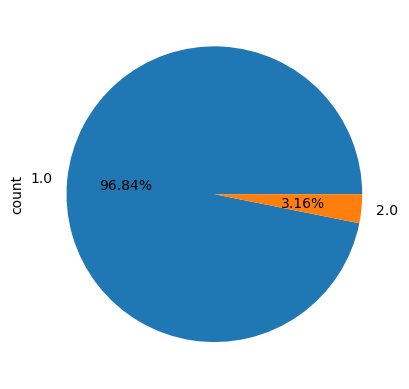

In [38]:
# value_counts() will combine the values into groups and gives the values acccording to it
# pie diagrams of-trip_type,payment_type,RatecodeId
greentaxi.trip_type.value_counts().plot(kind='pie',autopct="%0.2f%%")

<Axes: ylabel='count'>

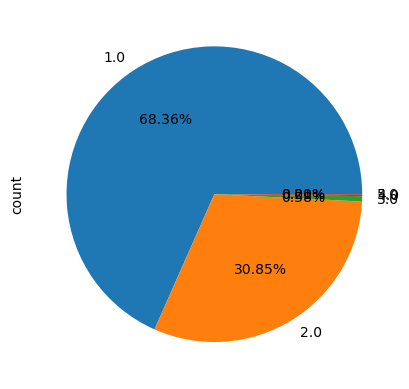

In [39]:
greentaxi.payment_type.value_counts().plot(kind='pie',autopct="%0.2f%%")

<Axes: ylabel='count'>

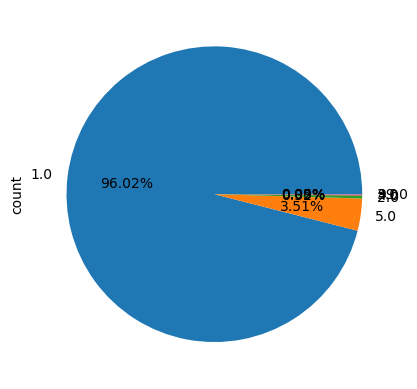

In [40]:
greentaxi.RatecodeID.value_counts().plot(kind='pie',autopct="%0.2f%%")

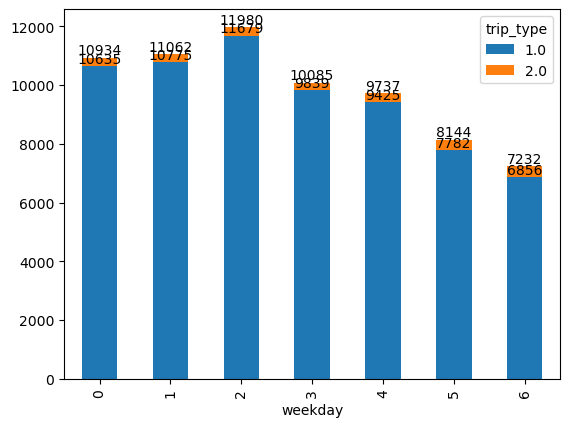

In [163]:
# CrossTab : it compares the result of one or more variables with result of another variable
#crosstab andstacked Bar diagram of weekdayand trip_type,weekday&payment_type,hour and payment_type
ax=pd.crosstab(greentaxi.weekday,greentaxi.trip_type).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

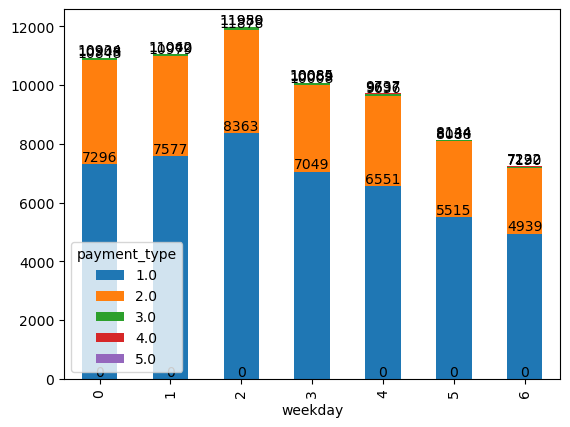

In [164]:
ax1=pd.crosstab(greentaxi.weekday,greentaxi.payment_type).plot(kind='bar',stacked=True)
for i in ax1.containers:
    ax1.bar_label(i)

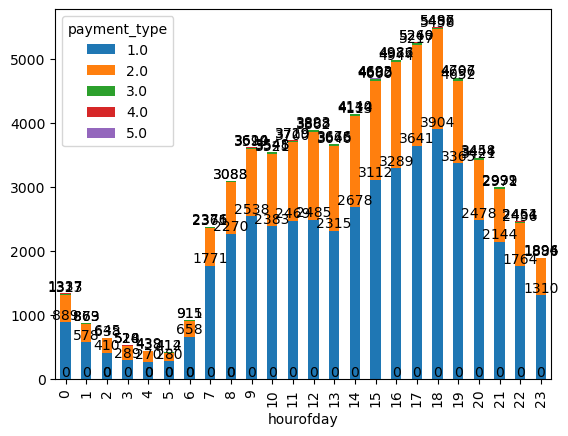

In [165]:
ax2=pd.crosstab(greentaxi.hourofday,greentaxi.payment_type).plot(kind='bar',stacked=True)
for i in ax2.containers:
    ax2.bar_label(i)

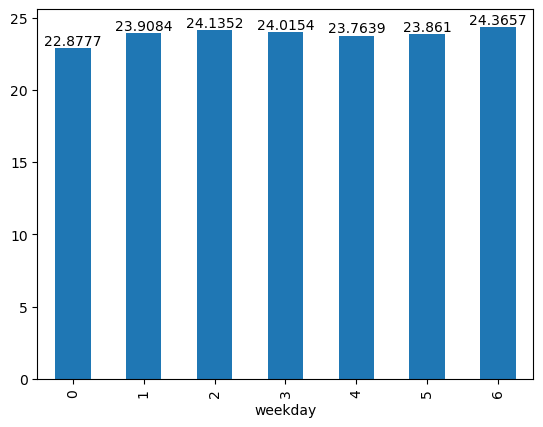

In [166]:
ax=greentaxi.total_amount.groupby(greentaxi.weekday).mean().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
#Trip Duration in week day,Saturday has the highest duration

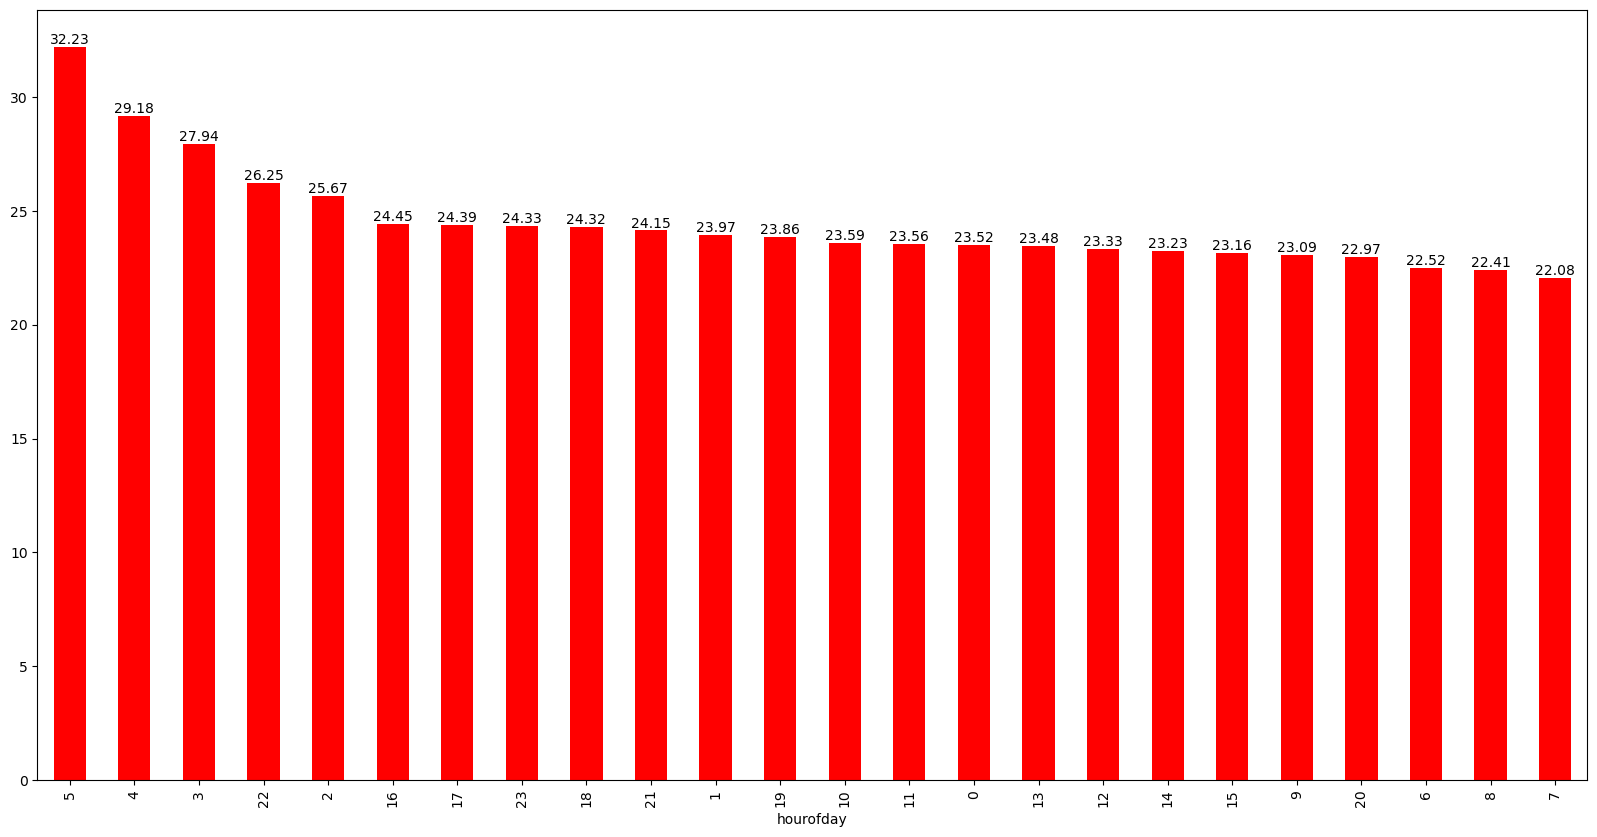

In [167]:
plt.figure(figsize=(20,10))
ax=np.round(greentaxi.total_amount.groupby(greentaxi.hourofday).mean(),2).sort_values(ascending=False).plot(kind='bar',color='red')
for i in ax.containers:
    ax.bar_label(i)
#in the graph early morning 5:00 has the huge demand for the taxi

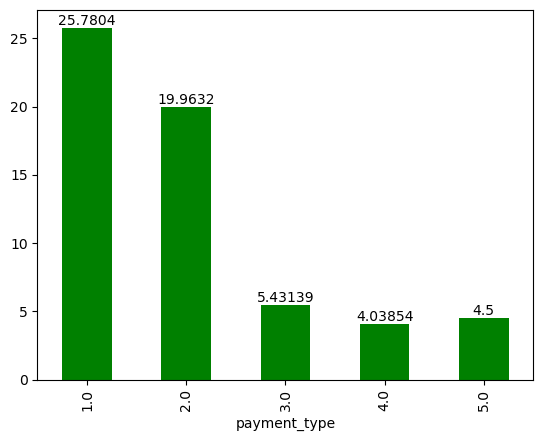

In [168]:
ax=greentaxi.total_amount.groupby(greentaxi.payment_type).mean().plot(kind='bar',color='green')
for i in ax.containers:
    ax.bar_label(i)

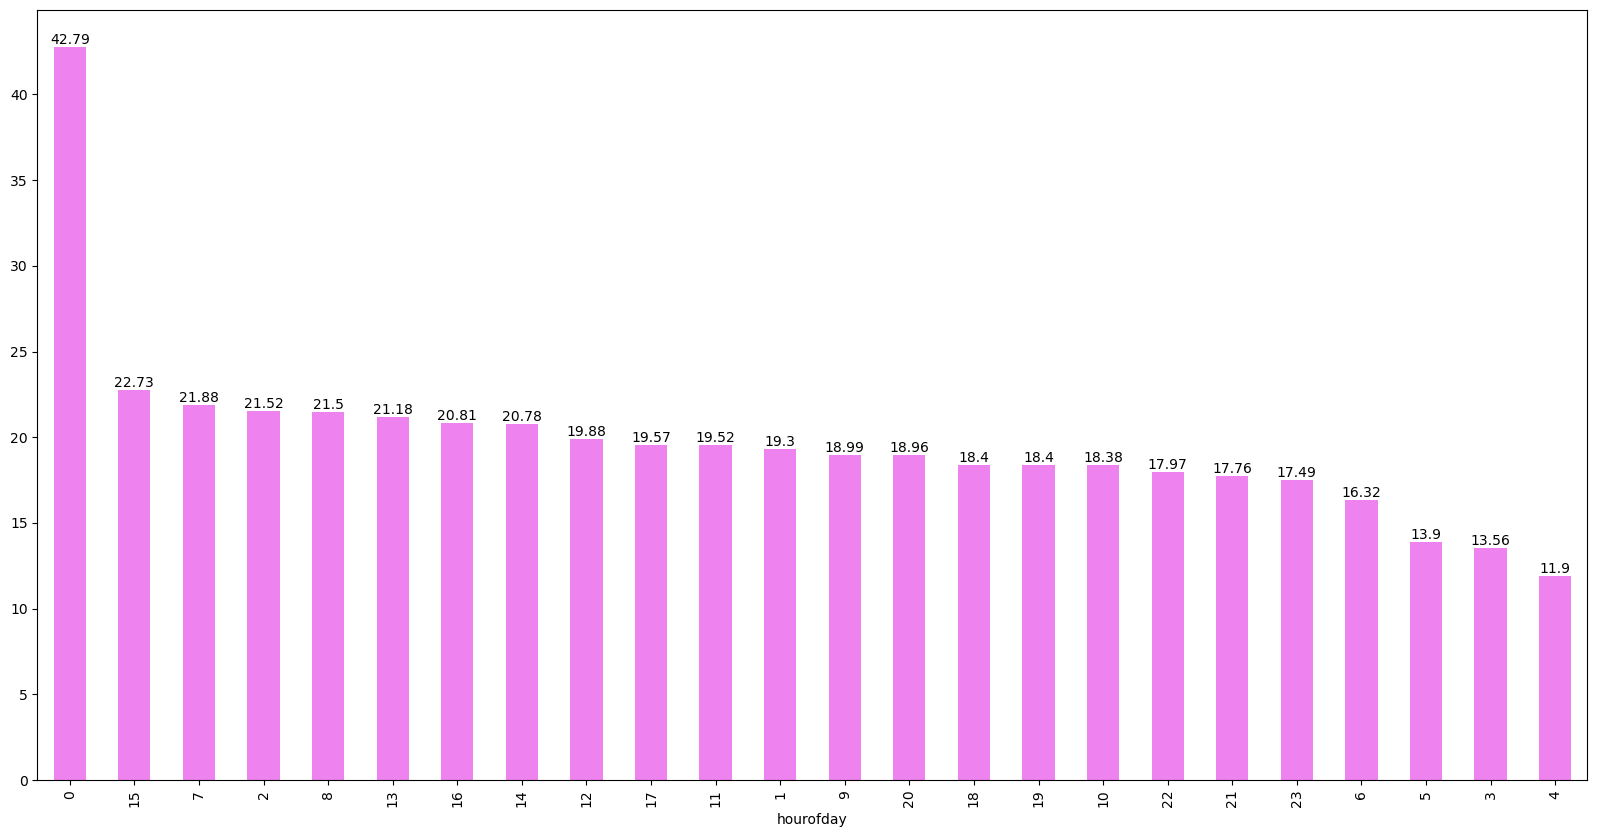

In [169]:
plt.figure(figsize=(20,10))
ax=np.round(greentaxi.trip_duration.groupby(greentaxi.hourofday).mean(),2).sort_values(ascending=False).plot(kind='bar',color='violet')
for i in ax.containers:
    ax.bar_label(i)

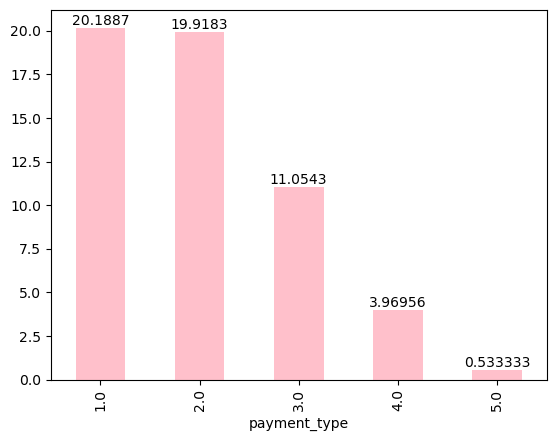

In [170]:
ax=greentaxi.trip_duration.groupby(greentaxi.payment_type).mean().plot(kind='bar',color='pink')
for i in ax.containers:
    ax.bar_label(i)

In [44]:
#GroupBy() : Pandas groupby is used for grouping the data according to the categories and applying
#a function to the categories


#groupby() mean forfollowing : weekday& total_amount,hour&total_amount,payment_type&totalamount
#weekday & trip_duration,hour & trip_duration, payment_typ & trip_duration
greentaxi.total_amount.groupby(greentaxi.weekday).mean()

weekday
0    22.877701
1    23.908406
2    24.135164
3    24.015407
4    23.763881
5    23.861000
6    24.365744
Name: total_amount, dtype: float64

In [45]:
greentaxi.total_amount.groupby(greentaxi.hourofday).mean()

hourofday
0     23.515759
1     23.969381
2     25.666543
3     27.938168
4     29.177699
5     32.225821
6     22.522634
7     22.075034
8     22.409683
9     23.088431
10    23.589651
11    23.561132
12    23.328017
13    23.481782
14    23.229157
15    23.164769
16    24.449924
17    24.385861
18    24.317724
19    23.859717
20    22.973994
21    24.152754
22    26.247944
23    24.327289
Name: total_amount, dtype: float64

In [46]:
greentaxi.total_amount.groupby(greentaxi.payment_type).mean()

payment_type
1.0    25.780425
2.0    19.963180
3.0     5.431393
4.0     4.038542
5.0     4.500000
Name: total_amount, dtype: float64

In [47]:
greentaxi.trip_duration.groupby(greentaxi.weekday).mean()

weekday
0    18.102442
1    19.206054
2    20.190806
3    20.043437
4    20.436111
5    22.531876
6    20.442245
Name: trip_duration, dtype: float64

In [48]:
greentaxi.trip_duration.groupby(greentaxi.hourofday).mean()

hourofday
0     42.793169
1     19.300477
2     21.524755
3     13.562214
4     11.896963
5     13.901771
6     16.319508
7     21.879440
8     21.502882
9     18.991220
10    18.383286
11    19.524336
12    19.878787
13    21.181180
14    20.780857
15    22.732264
16    20.811883
17    19.568254
18    18.396692
19    18.400921
20    18.956820
21    17.760565
22    17.970811
23    17.491350
Name: trip_duration, dtype: float64

In [49]:
greentaxi.trip_duration.groupby(greentaxi.payment_type).mean()

payment_type
1.0    20.188720
2.0    19.918320
3.0    11.054270
4.0     3.969560
5.0     0.533333
Name: trip_duration, dtype: float64

# inferential statistics

## Hypothesis testing

In [50]:
# Test null average total_amount of different trip_type is equal
# Test Null Average tip_amount of different trip_type is equal 
# Test Null Average total_amount for different weekday equal
# Test Null Average tip_amount for different weekday equal

# Test Null No Association between trip_type and payment_type
# Test Null No Association between RatecodeID and payment_type
# Test Null No Association between weekday and payment_type
# Test Null No Association between weekday and trip_type

# Ttest

In [51]:
#testnull average total_amount of different trip_type is equal
greentaxi.total_amount.groupby(greentaxi.trip_type).mean()

trip_type
1.0    23.352330
2.0    38.242895
Name: total_amount, dtype: float64

In [52]:
greentaxi.total_amount.groupby(greentaxi.trip_type).var()

trip_type
1.0     268.737906
2.0    1697.012919
Name: total_amount, dtype: float64

In [53]:
#null-there is no significance difference in average amount of total_amount of trip_type 1 & 2
#alt-there is significance difference in average amount of total_amount of trip_type 1 & 2

In [54]:
ones=greentaxi[greentaxi.trip_type==1.0]
twos=greentaxi[greentaxi.trip_type==2.0]

In [55]:
from scipy.stats import ttest_ind

In [56]:
ttest_ind(ones.total_amount,twos.total_amount,equal_var=False)
# since pvalue=5.457304023638798e-60 is less than 0.05 reject null

TtestResult(statistic=-16.84526324273241, pvalue=5.457304023638798e-60, df=2204.5760590335676)

In [57]:
# Test Null Average tip_amount of different trip_type is equal
greentaxi.tip_amount.groupby(greentaxi.trip_type).mean()

trip_type
1.0    2.392882
2.0    3.015369
Name: tip_amount, dtype: float64

In [58]:
ttest_ind(ones.tip_amount,twos.tip_amount,equal_var=False)
# since pvalue=0.0010745858666445013 is less than 0.05 reject null
#null-there is no significance difference in average amount of tip_amount of trip_type 1 & 2
#alt-there is significance difference in average amount of tip_amount of trip_type 1 & 2

TtestResult(statistic=-3.27456904334513, pvalue=0.0010745858666445013, df=2208.098340550297)

# ANOVA TEST

In [59]:
# Test Null Average total_amount for different weekday equal
greentaxi.total_amount.groupby(greentaxi.weekday).mean()

weekday
0    22.877701
1    23.908406
2    24.135164
3    24.015407
4    23.763881
5    23.861000
6    24.365744
Name: total_amount, dtype: float64

In [60]:
zero=greentaxi[greentaxi.weekday==0]
one=greentaxi[greentaxi.weekday==1]
two=greentaxi[greentaxi.weekday==2]
three=greentaxi[greentaxi.weekday==3]
four=greentaxi[greentaxi.weekday==4]
five=greentaxi[greentaxi.weekday==5]
six=greentaxi[greentaxi.weekday==6]

In [61]:
from scipy.stats import f_oneway

In [62]:
f_oneway(zero.total_amount,one.total_amount,two.total_amount,three.total_amount,four.total_amount,five.total_amount,
         six.total_amount)
#since pvalue=1.5781665738843715e-07 is less than 0.05 reject null

F_onewayResult(statistic=7.057962027034131, pvalue=1.5781665738843715e-07)

In [63]:
# Test Null Average tip_amount for different weekday equal
greentaxi.tip_amount.groupby(greentaxi.weekday).mean()

weekday
0    2.267933
1    2.408225
2    2.485913
3    2.510017
4    2.325503
5    2.398024
6    2.513699
Name: tip_amount, dtype: float64

In [64]:
f_oneway(zero.tip_amount,one.tip_amount,two.tip_amount,three.tip_amount,four.tip_amount,five.tip_amount,six.tip_amount)
# since pvalue=1.1035304312725308e-05 is less than 0.05 reject null

F_onewayResult(statistic=5.481926987405262, pvalue=1.1035304312725308e-05)

# Chi Sqaure Test

In [65]:
# Test Null No Association between trip_type and payment_type
pd.crosstab(greentaxi.trip_type,greentaxi.payment_type)


payment_type,1.0,2.0,3.0,4.0,5.0
trip_type,,,,,
1.0,45800,20679,378,133,1
2.0,1490,658,24,11,0


In [66]:
#null- there is no association between both variables
#alt - there is association between both variables

In [67]:
from scipy.stats import chi2_contingency

In [68]:
chi2_contingency(pd.crosstab(greentaxi.trip_type,greentaxi.payment_type))
#since pvalue=0.0004385012882035308 is less than 0.05 reject null

Chi2ContingencyResult(statistic=20.285910588961, pvalue=0.0004385012882035308, dof=4, expected_freq=array([[4.57976175e+04, 2.06636448e+04, 3.89313644e+02, 1.39455634e+02,
        9.68441900e-01],
       [1.49238254e+03, 6.73355177e+02, 1.26863561e+01, 4.54436638e+00,
        3.15580999e-02]]))

In [69]:
# Test Null No Association between weekday and payment_type
pd.crosstab(greentaxi.weekday,greentaxi.payment_type)

payment_type,1.0,2.0,3.0,4.0,5.0
weekday,,,,,
0,7296,3552,60,26,0
1,7577,3402,61,22,0
2,8363,3515,81,21,0
3,7049,2959,61,15,1
4,6551,3085,61,40,0
5,5515,2573,46,10,0
6,4939,2251,32,10,0


In [70]:
#null- there is no association between both variables
#alt- there is association between both variables

In [71]:
chi2_contingency(pd.crosstab(greentaxi.weekday,greentaxi.payment_type))
#since pvalue=4.532248995318973e-08 is less than 0.05 reject null

Chi2ContingencyResult(statistic=80.80132526421853, pvalue=4.532248995318973e-08, dof=24, expected_freq=array([[7.47490184e+03, 3.37263651e+03, 6.35421979e+01, 2.27613843e+01,
        1.58065169e-01],
       [7.56240755e+03, 3.41211863e+03, 6.42860612e+01, 2.30278428e+01,
        1.59915575e-01],
       [8.18998757e+03, 3.69527944e+03, 6.96209559e+01, 2.49388499e+01,
        1.73186457e-01],
       [6.89449287e+03, 3.11075903e+03, 5.86082921e+01, 2.09940151e+01,
        1.45791771e-01],
       [6.65658672e+03, 3.00341702e+03, 5.65859138e+01, 2.02695811e+01,
        1.40760980e-01],
       [5.56755081e+03, 2.51204973e+03, 4.73283025e+01, 1.69534218e+01,
        1.17732096e-01],
       [4.94407263e+03, 2.23073964e+03, 4.20282765e+01, 1.50549050e+01,
        1.04547952e-01]]))

In [72]:
# Test Null No Association between RatecodeID and payment_type
pd.crosstab(greentaxi.RatecodeID,greentaxi.payment_type)

payment_type,1.0,2.0,3.0,4.0,5.0
RatecodeID,,,,,
1.0,45524,20410,358,131,1
2.0,138,68,14,0,0
3.0,22,7,4,1,0
4.0,38,24,0,1,0
5.0,1565,828,26,11,0
99.0,3,0,0,0,0


In [73]:
#null- there is no association between both variables
#alt- there is association between both variables

In [74]:
chi2_contingency(pd.crosstab(greentaxi.RatecodeID,greentaxi.payment_type))
#since pvalue=3.2670230054629802e-43 is less than 0.05 reject null

Chi2ContingencyResult(statistic=257.646461298014, pvalue=3.2670230054629802e-43, dof=20, expected_freq=array([[4.54099945e+04, 2.04887514e+04, 3.86018562e+02, 1.38275306e+02,
        9.60245179e-01],
       [1.50400439e+02, 6.78598896e+01, 1.27851505e+00, 4.57975540e-01,
        3.18038569e-03],
       [2.32437043e+01, 1.04874375e+01, 1.97588689e-01, 7.07780380e-02,
        4.91514153e-04],
       [4.30692168e+01, 1.94326047e+01, 3.66120219e-01, 1.31147541e-01,
        9.10746812e-04],
       [1.66124122e+03, 7.49543326e+02, 1.41217799e+01, 5.05854801e+00,
        3.51288056e-02],
       [2.05091508e+00, 9.25362130e-01, 1.74342961e-02, 6.24512100e-03,
        4.33688958e-05]]))

In [75]:
# Test Null No Association between weekday and trip_type
pd.crosstab(greentaxi.weekday,greentaxi.trip_type)

trip_type,1.0,2.0
weekday,,
0,10635,299
1,10775,287
2,11679,301
3,9839,246
4,9425,312
5,7782,362
6,6856,376


In [76]:
#null- there is no association between both variables
#alt- there is association between both variables

In [77]:
chi2_contingency(pd.crosstab(greentaxi.weekday,greentaxi.trip_type))
#since pvalue=3.458694063594574e-39 is less than 0.05 reject null

Chi2ContingencyResult(statistic=194.0751725639184, pvalue=3.458694063594574e-39, dof=6, expected_freq=array([[10588.94373609,   345.05626391],
       [10712.9042993 ,   349.0957007 ],
       [11601.93396363,   378.06603637],
       [ 9766.73656287,   318.26343713],
       [ 9429.71878162,   307.28121838],
       [ 7886.99083471,   257.00916529],
       [ 7003.77182178,   228.22817822]]))

# Split data into NUMCOLS and OBJCOLS for model building

In [78]:
greentaxi.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'trip_duration',
       'weekday', 'hourofday'],
      dtype='object')

In [79]:
numcols=greentaxi[[ 'trip_distance', 'fare_amount', 'extra', 'mta_tax','tip_amount', 'tolls_amount',
                   'improvement_surcharge','congestion_surcharge','trip_duration']]

In [80]:
objcols=greentaxi[['store_and_fwd_flag','RatecodeID','passenger_count','payment_type', 'trip_type','weekday','hourofday']]

In [81]:
numcols.head()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_duration
0,6.99,28.90,1.0,0.5,0.00,0.00,1.0,0.00,13.266667
1,6.60,30.30,1.0,0.5,5.00,0.00,1.0,2.75,20.366667
2,1.34,9.30,1.0,0.5,2.36,0.00,1.0,0.00,6.883333
3,7.79,22.73,0.0,0.0,2.29,6.55,1.0,0.00,20.450000
4,0.70,6.50,1.0,0.5,0.00,0.00,1.0,0.00,3.466667


In [82]:
objcols.head()

,store_and_fwd_flag,RatecodeID,passenger_count,payment_type,trip_type,weekday,hourofday
0,N,1.0,1.0,1.0,1.0,0,1
1,N,1.0,1.0,1.0,1.0,0,0
2,N,1.0,1.0,1.0,1.0,0,0
3,N,5.0,1.0,1.0,1.0,0,0
4,N,1.0,1.0,2.0,1.0,0,0


# Dummy Encoding

In [83]:
obj_dummies=pd.get_dummies(objcols,columns=['store_and_fwd_flag','RatecodeID','passenger_count','payment_type',
                                            'trip_type','weekday','hourofday'])

In [84]:
obj_dummies.head()

,store_and_fwd_flag_N,store_and_fwd_flag_Y,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_99.0,passenger_count_0.0,passenger_count_1.0,...,hourofday_14,hourofday_15,hourofday_16,hourofday_17,hourofday_18,hourofday_19,hourofday_20,hourofday_21,hourofday_22,hourofday_23
0,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [85]:
obj_dummies.replace({False:0,True:1},inplace=True)

In [86]:
obj_dummies.head()

,store_and_fwd_flag_N,store_and_fwd_flag_Y,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_99.0,passenger_count_0.0,passenger_count_1.0,...,hourofday_14,hourofday_15,hourofday_16,hourofday_17,hourofday_18,hourofday_19,hourofday_20,hourofday_21,hourofday_22,hourofday_23
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
X=pd.concat([numcols,obj_dummies],axis=1)
y=greentaxi.total_amount

<Axes: xlabel='total_amount', ylabel='Count'>

<Figure size 3000x1500 with 0 Axes>

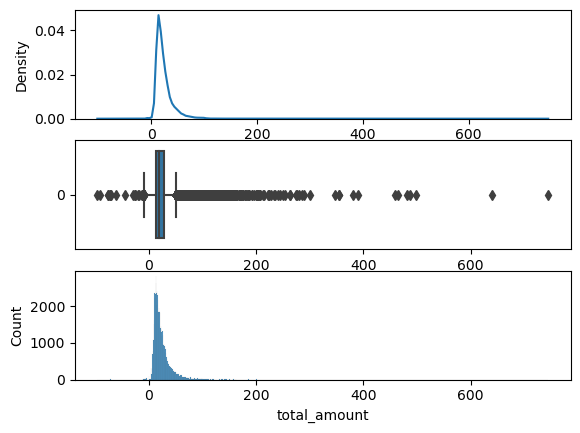

In [88]:
#hist,box,&density curve-y
#By this we will check the Skewness and Kurtosis
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(y,ax=ax[0])
sns.boxplot(y,orient='h',ax=ax[1])
sns.histplot(y,ax=ax[2])

<Axes: ylabel='Density'>

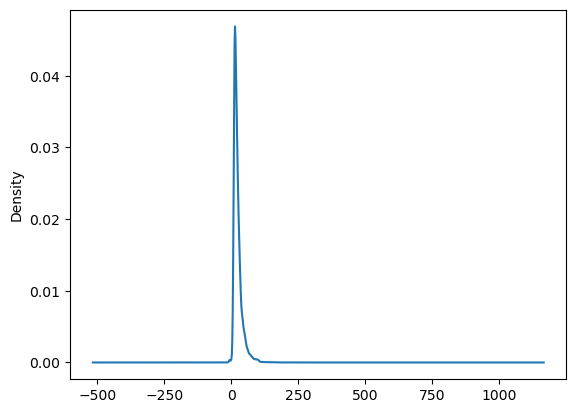

In [89]:
y.plot(kind='density')

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr

<Axes: xlabel='total_amount', ylabel='Count'>

<Figure size 3000x1500 with 0 Axes>

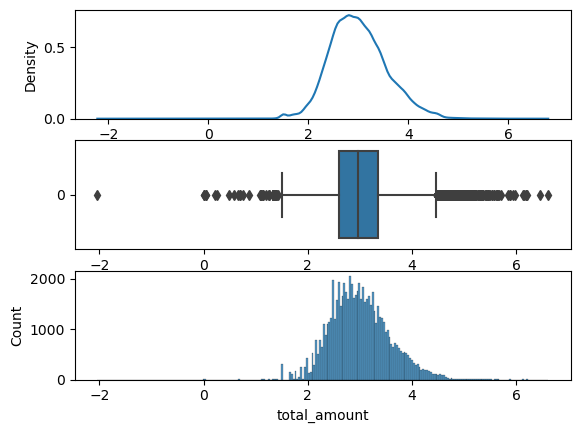

In [90]:
#hist,box,&density curve-y
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(np.log(y),ax=ax[0])
sns.boxplot(np.log(y),orient='h',ax=ax[1])
sns.histplot(np.log(y),ax=ax[2])
#logarithm transformation

<Axes: >

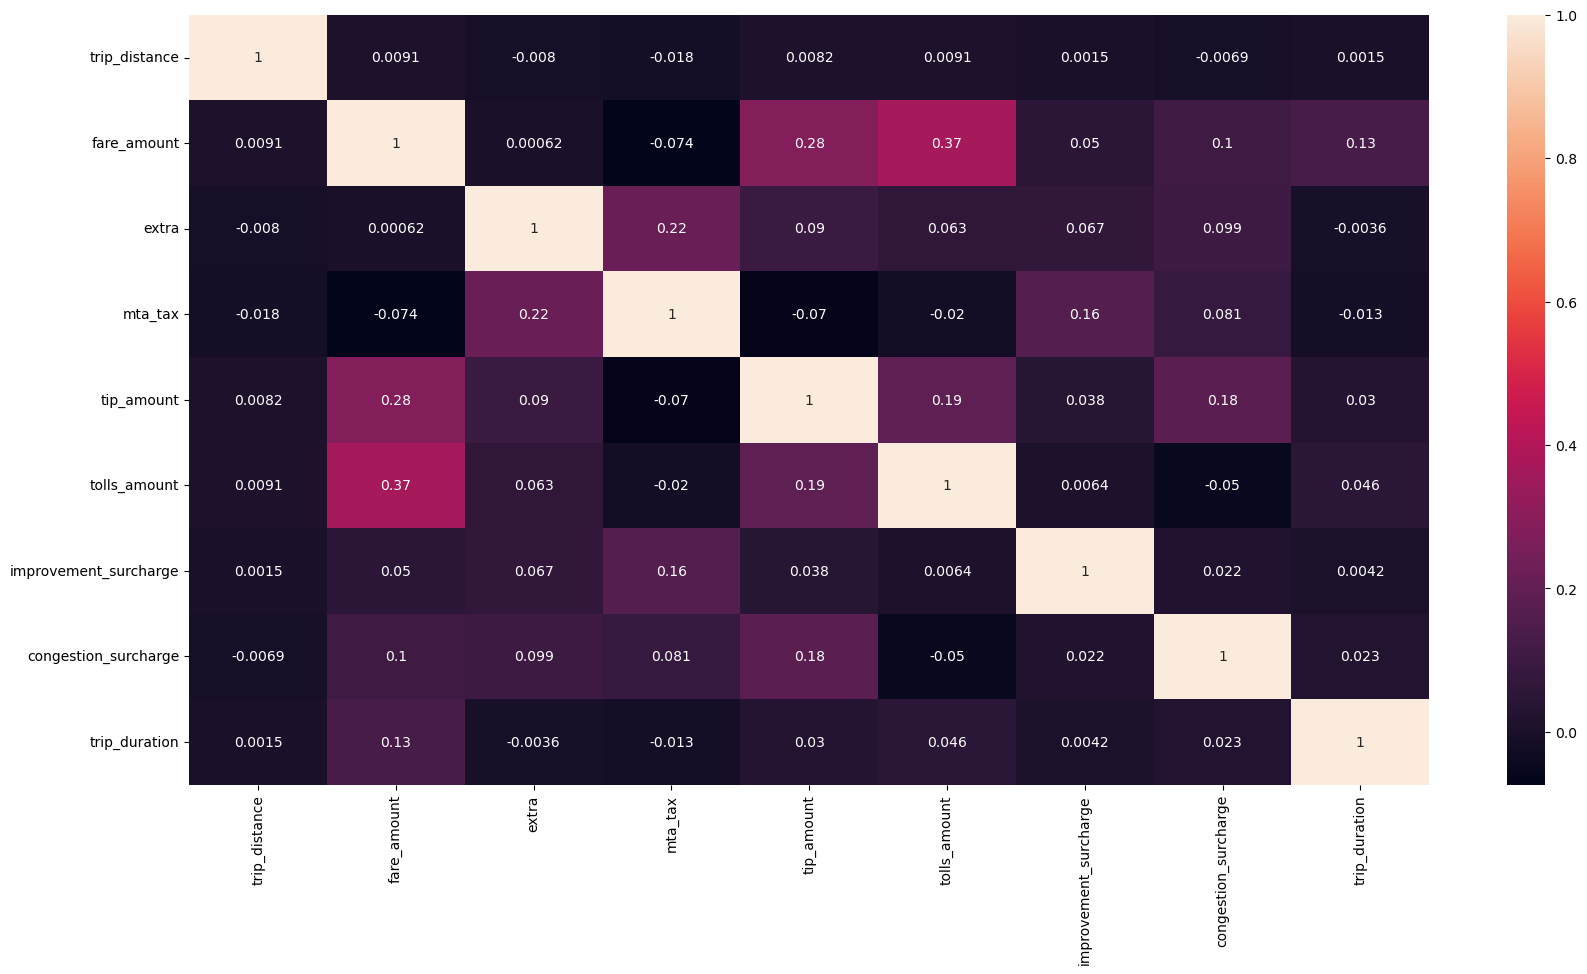

In [91]:
#with th help of Heat map we can know the Multycollinaerity amoung the variables
plt.figure(figsize=(20,10))
sns.heatmap(numcols.corr(),annot=True)

In [173]:
numericcols2=numcols

In [174]:
numericcols2['total_amount']=greentaxi.total_amount

C:\Users\HP\AppData\Local\Temp\ipykernel_11160\3306182408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericcols2['total_amount']=greentaxi.total_amount


<Axes: >

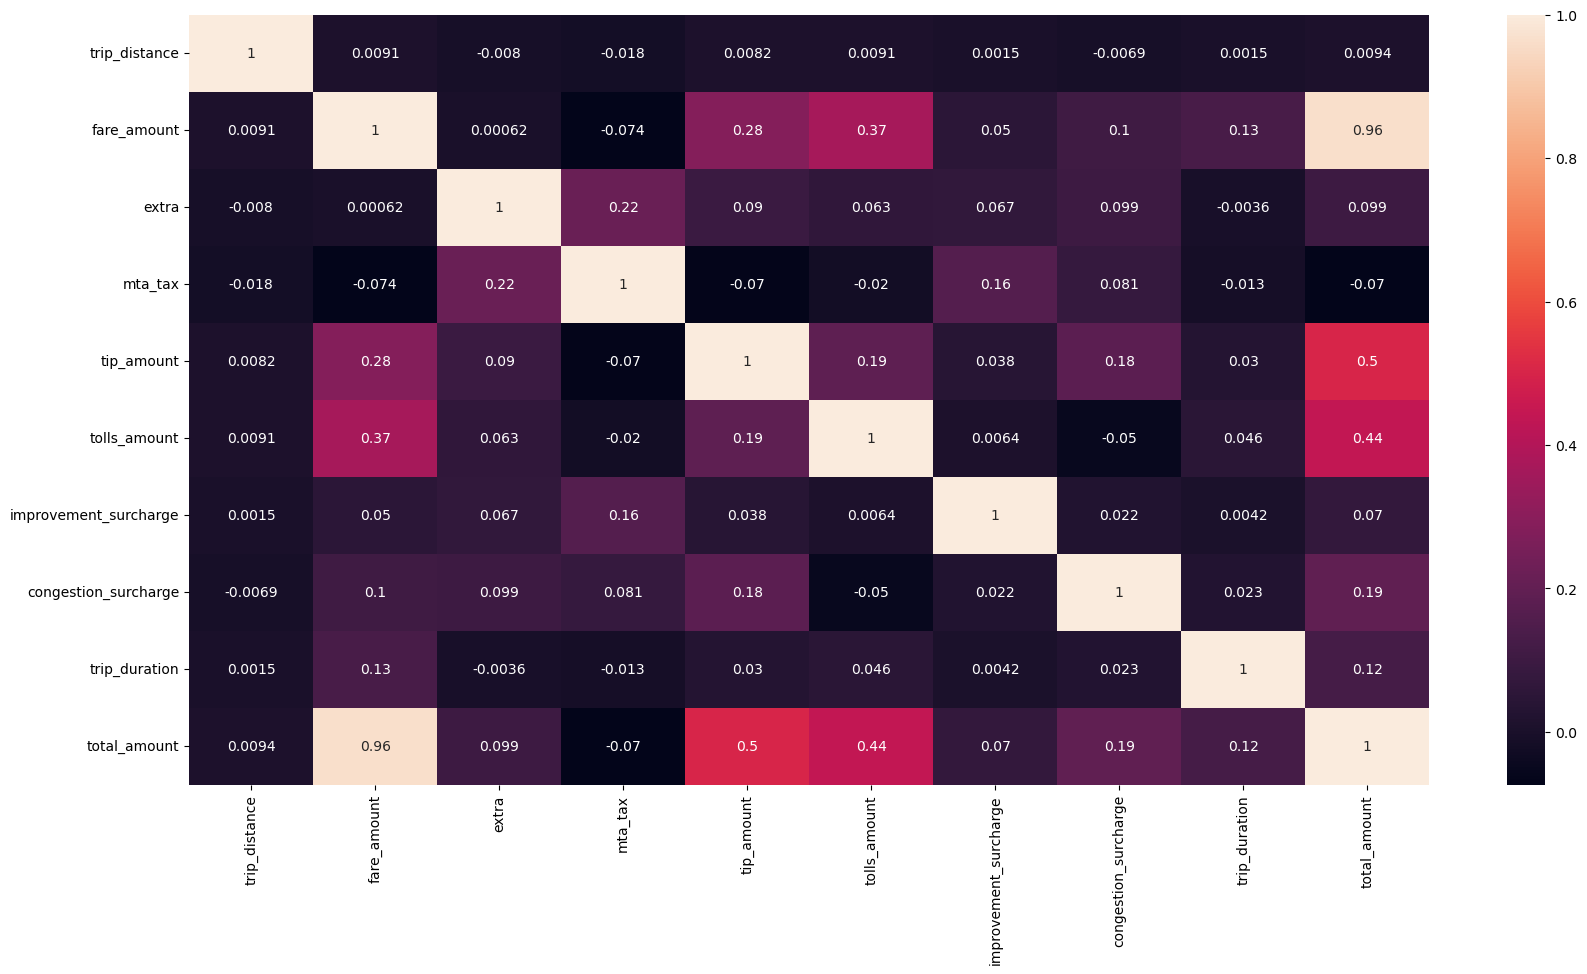

In [175]:
plt.figure(figsize=(20,10))
sns.heatmap(numericcols2.corr(),annot=True)

In [92]:
X=X.drop('fare_amount',axis=1)

# Model Building

# Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
reg=LinearRegression()

In [95]:
regmodel=reg.fit(X,y)

In [96]:
regmodel.score(X,y)

0.46153609909092563

In [97]:
regpredict=regmodel.predict(X)

In [98]:
regresid=y-regpredict

In [99]:
np.sqrt(np.mean(regresid**2))#RMSE

13.138104982545146

# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
tree=DecisionTreeRegressor(max_depth=7)

In [112]:
treemodel=tree.fit(X,y)

In [113]:
treemodel.score(X,y)

0.8261999736172163

In [114]:
treepredict=treemodel.predict(X)

In [115]:
treeresid=y=treepredict

In [116]:
np.sqrt(np.mean(treeresid**2))#RMSE

28.850404896280455

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
rf=RandomForestRegressor(n_estimators=100,max_depth=5)

In [183]:
rfmodel=rf.fit(X,y)

In [184]:
rfmodel.score(X,y)

0.9301837115451737

In [185]:
rfpredict=rfmodel.predict(X)

In [186]:
rfresid=y-rfpredict

In [187]:
np.sqrt(np.mean(rfresid**2))

4.300068741561202

# Gradient Boosting

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
gb=GradientBoostingRegressor(n_estimators=100,max_depth=1)

In [126]:
gbmodel=gb.fit(X,y)

In [127]:
gbmodel.score(X,y)

0.8462969811924126

In [128]:
gbpredict=gbmodel.predict(X)

In [129]:
gbresid=y-gbpredict

In [130]:
np.sqrt(np.mean(gbresid**2))# RMSE

6.3802576711148475

# Support Vector Machine (SVM)

In [156]:
from sklearn.svm import SVR

In [157]:
svm=SVR(C=6)

In [158]:
svmmodel=svm.fit(X,y)

In [159]:
svmmodel.score(X,y)

0.5379976038087095

In [160]:
svmpredict=svmmodel.predict(X)

In [161]:
svresid=y-svmpredict

In [162]:
np.sqrt(np.mean(svresid**2))#RMSE

11.06163015347371

# KNN

In [131]:
from sklearn.neighbors import KNeighborsRegressor

In [150]:
kn=KNeighborsRegressor(n_neighbors=6)

In [151]:
knmodel=kn.fit(X,y)

In [152]:
knmodel.score(X,y)

0.923554618881671

In [153]:
knpredict=knmodel.predict(X)

In [154]:
knid=y-knpredict

In [155]:
np.sqrt(np.mean(knid**2))#RMSE

4.4995869109458475

# Linear Regression:

R-squared: 0.4615
RMSE: 13.14
# Decision Tree Regression:

R-squared: 0.8262
RMSE: 28.85
# Random Forest Regression:

R-squared: 0.9302
RMSE: 4.30
# Gradient Boosting Regression:

R-squared: 0.8463
RMSE: 6.38
# Support Vector Regressor:

R-squared: 0.5380
RMSE: 11.06
# K-Nearest Neighbors Regression:

R-squared: 0.9236
RMSE: 4.50


# Summary:

Among the models you've evaluated, the Random Forest Regression model stands out as the best performer. It has the highest R-squared value (0.9302), indicating that it explains a significant portion of the variance in the total fare amounts. Additionally, it has the lowest RMSE (4.30), which means it has the smallest average prediction error in terms of fare amounts.

The K-Nearest Neighbors (KNN) Regression model also performs very well with a high R-squared value (0.9236) and a low RMSE (4.50). It is a strong contender for the best-fit model.

The Decision Tree and Gradient Boosting models have decent R-squared values and perform reasonably well, but they have higher RMSE values compared to the Random Forest and KNN models.

The Linear Regression and Support Vector Regressor models have relatively lower R-squared values and higher RMSE values, indicating that they may not explain the variance in fare amounts as well as the other models.

# Best Fit Model:
Based on the provided performance metrics, the Random Forest Regression model appears to be the best fit for your taxi fare prediction task. It has the highest R-squared value and the lowest RMSE, indicating its ability to provide accurate predictions and explain a significant portion of the variance in fare amounts. However, it's also a good practice to consider other factors, such as model interpretability and computational complexity, when selecting the final model for deployment.